<a href="https://colab.research.google.com/github/HeiZemBerg/IAUFD-DataBase/blob/master/IAUFD_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl #openpyxl for read/write in excel 2010

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tensorflow import keras
from keras import layers, applications
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout,Flatten
from keras.layers import MaxPooling2D, Conv2D, SeparableConv2D, Input, concatenate, ActivityRegularization, Add
from keras.utils import load_img, plot_model, img_to_array
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Read DataSet

dataset's columns ['Image Number','Goal','Start/Restart the game','the joy of the player','Yellow Card','Red Card','Ball','Stadium View','Referee Image','Penalty Image','Free Kick']




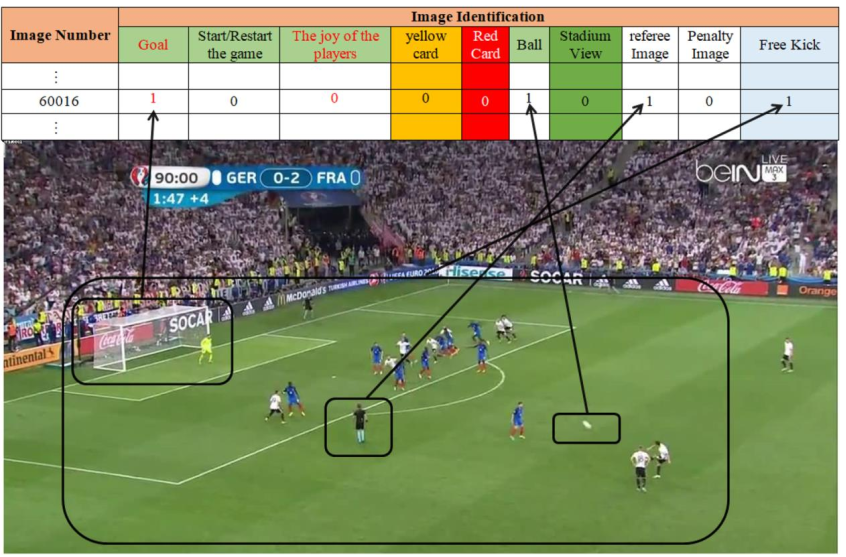

In [3]:
#DataSet photo exteraction
!unrar e '/content/drive/MyDrive/IAUFD/dataset.part1.rar' /content/dataset/ -idq

In [4]:
# Function change the name and type of Columns
def change_dataframe(data):    
    #replace dataset errors
    data['Unnamed: 8']=data['Unnamed: 8'].replace(' ',1)
    data['Unnamed: 8']=data['Unnamed: 8'].replace(11,1)
    data['Unnamed: 6']=data['Unnamed: 6'].replace(11,1)
    data['Unnamed: 10']=data['Unnamed: 10'].replace(11,1)
    data['Image Identification']=data['Image Identification'].replace(11,1)
    
    df=pd.DataFrame()
    
    df['Image Number']=data['Image Number'].astype('int32')
    df['Gate']=data['Image Identification'].astype('int32')
    df['Start/Restart the game']=data['Unnamed: 2'].astype('int32')
    df['The joy of the players']=data['Unnamed: 3'].astype('int32')
    df['yellow card']=data['Unnamed: 4'].astype('int32')
    df['Red Card']=data['Unnamed: 5'].astype('int32')
    df['Ball']=data['Unnamed: 6'].astype('int32')
    df['Stadium View']=data['Unnamed: 7'].astype('int32')
    df['referee Image']=data['Unnamed: 8'].astype('int32')
    df['Penalty Image']=data['Unnamed: 9'].astype('int32')
    df['Free Kick']=data['Unnamed: 10'].astype('int32')
    return df

#read dataset from drive and change dataset
data=change_dataframe(pd.read_excel('/content/drive/MyDrive/IAUFD/IAUSD  Lable.xlsx').iloc[1:])

data.info()
display(data.head(10))
print(f"""
the DataSet has 100,000 data whose number of Gool is equal :
{data['Gate'].value_counts()}
0 isn't Gool
1 is Gool 
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Image Number            100000 non-null  int32
 1   Gate                    100000 non-null  int32
 2   Start/Restart the game  100000 non-null  int32
 3   The joy of the players  100000 non-null  int32
 4   yellow card             100000 non-null  int32
 5   Red Card                100000 non-null  int32
 6   Ball                    100000 non-null  int32
 7   Stadium View            100000 non-null  int32
 8   referee Image           100000 non-null  int32
 9   Penalty Image           100000 non-null  int32
 10  Free Kick               100000 non-null  int32
dtypes: int32(11)
memory usage: 4.2 MB


,Image Number,Gate,Start/Restart the game,The joy of the players,yellow card,Red Card,Ball,Stadium View,referee Image,Penalty Image,Free Kick
1,1,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,1,1,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,0
5,5,0,0,0,0,0,1,0,1,0,0
6,6,0,0,0,0,0,1,0,0,0,0
7,7,0,0,0,0,0,1,0,1,0,0
8,8,0,0,0,0,0,1,0,1,0,0
9,9,0,0,0,0,0,0,0,1,0,0
10,10,0,0,0,0,0,1,0,1,0,0



the DataSet has 100,000 data whose number of Gool is equal :
0    75991
1    24009
Name: Gate, dtype: int64
0 isn't Gool
1 is Gool 



In [5]:
image_directory = '/content/dataset/' #Directory photos
SIZE = 100                            #the variable Size of photos for using in load_image function
X = []                                #List for keep photos load
for i in range(1,10001):              #Just load 10000 first as Dataset 
  img = load_img(image_directory + str(data['Image Number'][i]) + '.jpg' , target_size=(SIZE,SIZE,3))
  img = img_to_array(img)
  img=img/255.
  X.append(img)

X=np.array(X)
y=np.array(data.iloc[:10000].drop(['Image Number','Gate'] , axis=1))
y=np.array(y)

print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')

X_shape: (10000, 100, 100, 3)
y_shape: (10000, 9)


Seprate Train and Test data from dataset   

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

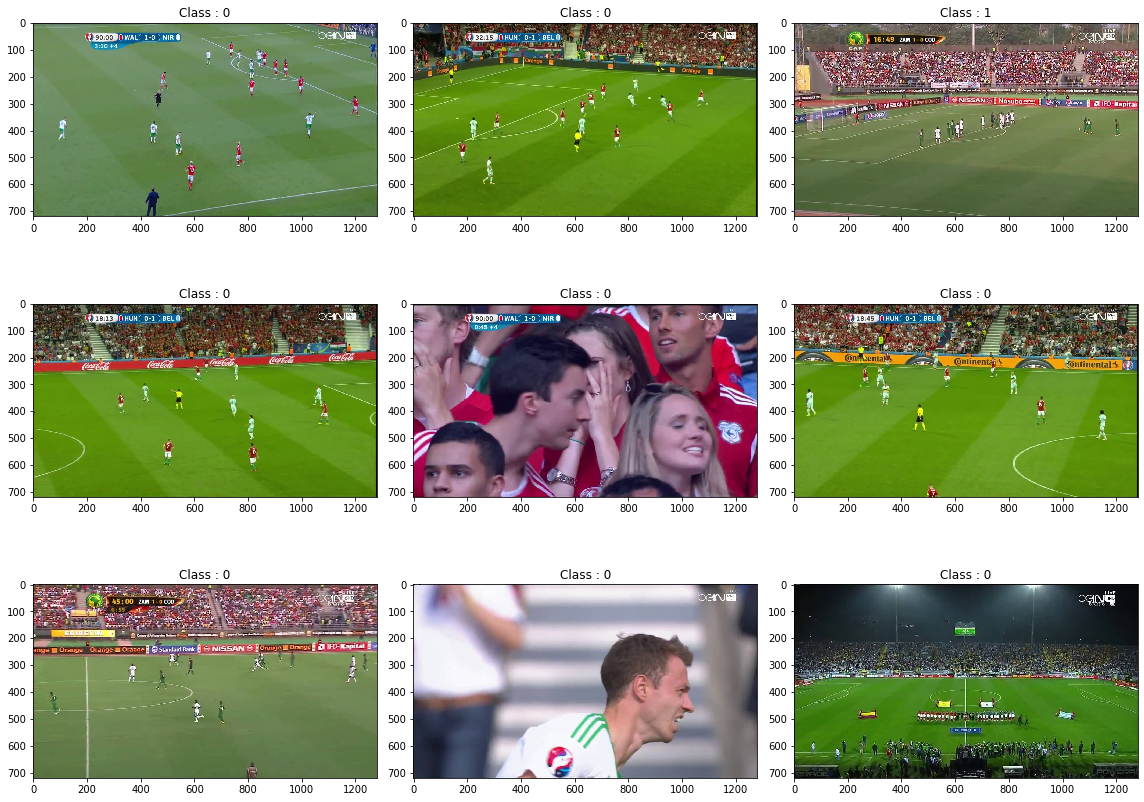

In [7]:
plt.rcParams['figure.figsize'] = (16,12)   #Size of figure


for i in range(9):                        
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(load_img('/content/dataset/' + str(data['Image Number'][num]) + '.jpg'), cmap='gray', interpolation='none')
    plt.title(f"Class : {data['Gate'].iloc[num-1]}")
  
plt.tight_layout()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 98, 98, 16)   448         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_21 (BatchN  (None, 98, 98, 16)  64          ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                            

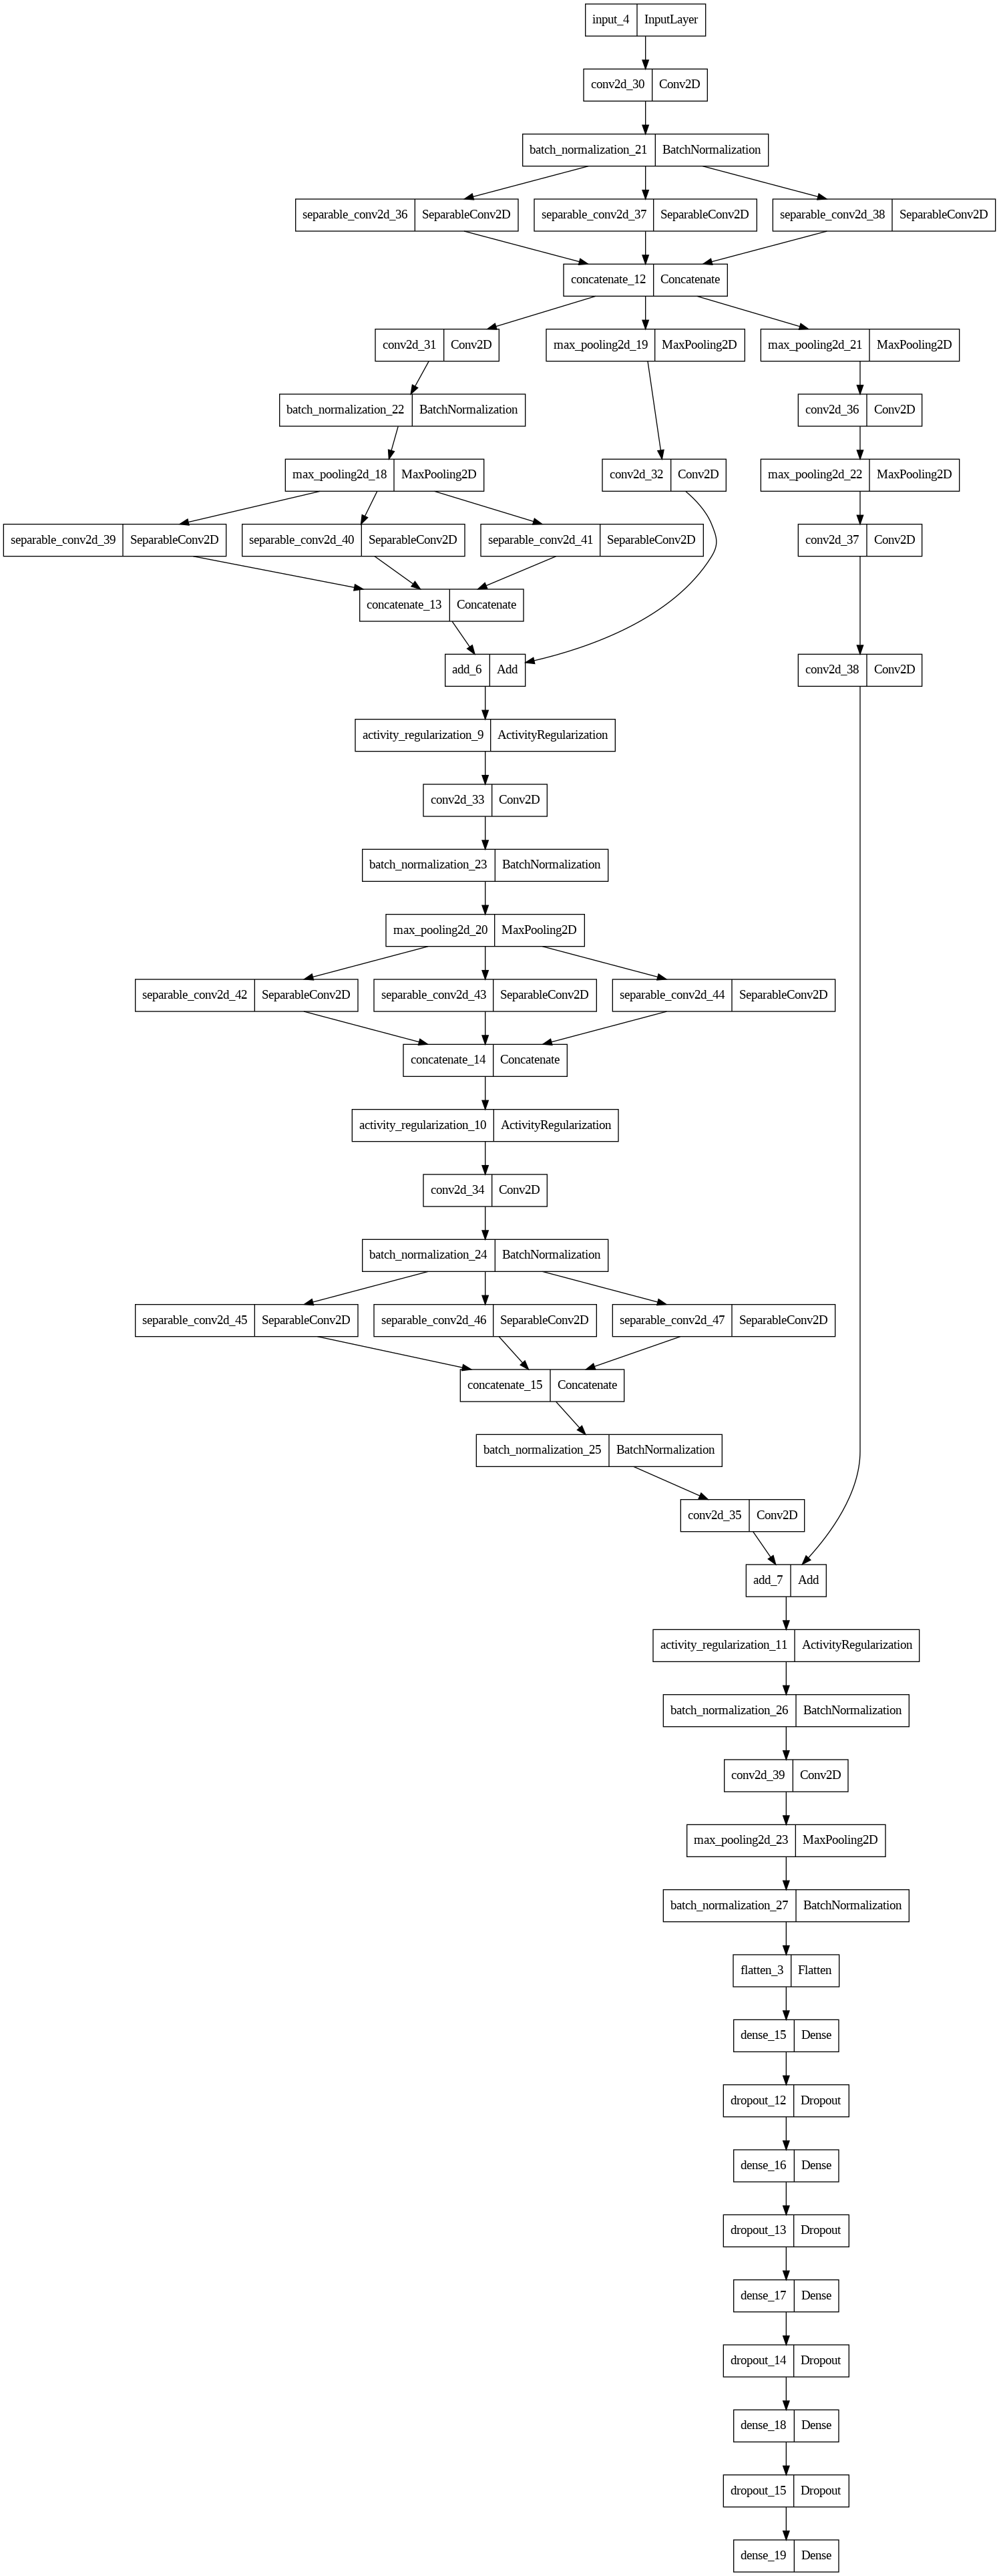

In [17]:
input_flow= Input(shape=(100,100,3))
x = Conv2D(16,(3,3),activation='relu')(input_flow)
x = BatchNormalization()(x)

x1 = SeparableConv2D(16,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(16,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(16,(7,7),activation='relu',padding='same')(x)

x_2 = x_1 = x = concatenate([x1,x2,x3])

x = Conv2D(32,(5,5),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x1 = SeparableConv2D(32,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(32,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(32,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])

x_1 = MaxPooling2D(2,2)(x_1)
x_1 = Conv2D(96,(3,3),activation='relu')(x_1)

x = Add()([x_1,x])
x = ActivityRegularization(l1=0.001, l2=0.001)(x)

x = Conv2D(64,(5,5),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x1 = SeparableConv2D(64,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(64,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(64,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])



x = ActivityRegularization(l1=0.001, l2=0.001)(x)
x = Conv2D(128,(5,5),activation='relu')(x)
x = BatchNormalization()(x)

x1 = SeparableConv2D(128,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(128,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(128,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])
x = BatchNormalization()(x)

x = Conv2D(256,(7,7),activation='elu')(x)

x_2 = MaxPooling2D(2,2)(x_2)
x_2 = Conv2D(128,(3,3),activation='relu')(x_2)
x_2 = MaxPooling2D(2,2)(x_2)
x_2 = Conv2D(128,(7,7),activation='relu')(x_2)
x_2 = Conv2D(256,(7,7),activation='relu')(x_2)
x = Add()([x_2,x])

x = ActivityRegularization(l1=0.001, l2=0.001)(x)
x = BatchNormalization()(x)

x = Conv2D(512,(7,7),activation='elu')(x)
x = MaxPooling2D(2,2)(x)
x = BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='tanh')(x)
x = Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(16, activation='tanh')(x)
x = Dropout(0.5)(x)
x = layers.Dense(9, activation='softmax')(x)

model=Model(input_flow,x)
model.summary()
plot_model(model)

In [18]:
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,epochs=150, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/150
28/28 [==============================] - 39s 1s/step - loss: 37.8220 - accuracy: 0.1033 - val_loss: 2.0679 - val_accuracy: 0.0053
Epoch 2/150
28/28 [==============================] - 31s 1s/step - loss: 13.3556 - accuracy: 0.1247 - val_loss: 2.0772 - val_accuracy: 0.0053
Epoch 3/150
28/28 [==============================] - 31s 1s/step - loss: 8.8317 - accuracy: 0.1353 - val_loss: 2.1264 - val_accuracy: 0.0053
Epoch 4/150
28/28 [==============================] - 31s 1s/step - loss: 6.8852 - accuracy: 0.1480 - val_loss: 2.2053 - val_accuracy: 0.0053
Epoch 5/150
28/28 [==============================] - 31s 1s/step - loss: 5.5071 - accuracy: 0.1566 - val_loss: 2.1744 - val_accuracy: 0.0053
Epoch 6/150
28/28 [==============================] - 31s 1s/step - loss: 4.8013 - accuracy: 0.1663 - val_loss: 2.2137 - val_accuracy: 0.0053
Epoch 7/150
28/28 [==============================] - 29s 1s/step - loss: 4.2049 - accuracy: 0.1739 - val_loss: 2.2932 - val_accuracy: 0.0053
Epoch 8/150

###Show History 

Test Accuracy: 0.4180000126361847 
Maximum Test Acuracy During Training:  0.4846666753292084


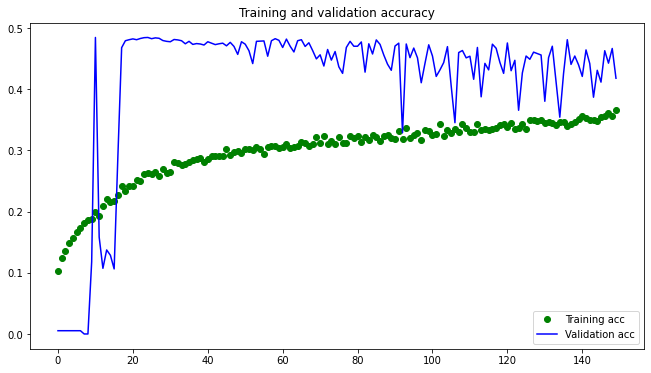

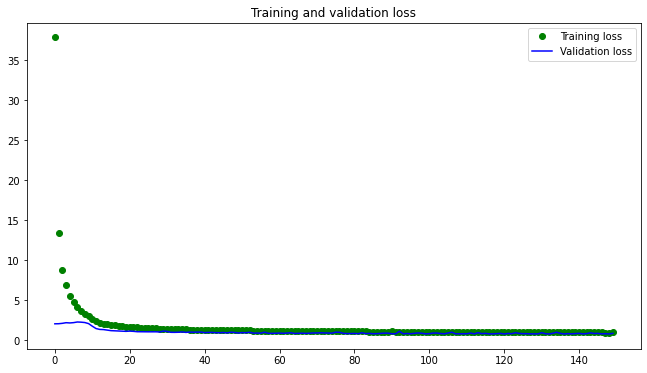

In [28]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams["figure.figsize"] = (11,6)

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
loss, acc = model.evaluate(X_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

94/94 [==============================] - 4s 41ms/step - loss: 0.8752 - accuracy: 0.4180

Testing loss: 0.88, acc: 0.42%
